In [185]:
from opensimplex import OpenSimplex
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Point, LineString
from shapely.ops import polygonize, unary_union, cascaded_union
import random
from descartes import PolygonPatch
import itertools

%matplotlib inline

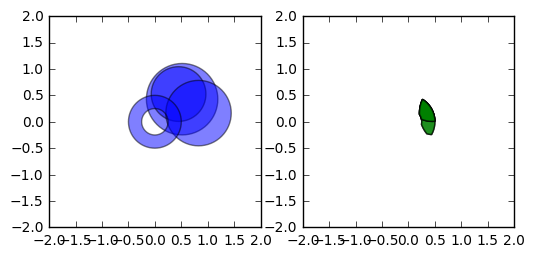

In [249]:
points = [Point(random.random(),random.random()).buffer(random.random()) for x in range(0,3)]

p1 = Point(0,0).buffer(0.5)
p2 = Point(0,0).buffer(0.25)

points += [p1.difference(p2)]

ax1 = plt.subplot(121)
ax1.set_xlim([-2,2])
ax1.set_ylim([-2,2])
ax1.set_aspect('equal')

ax2 = plt.subplot(122)
ax2.set_xlim([-2,2])
ax2.set_ylim([-2,2])
ax2.set_aspect('equal')

for p in points:
    ax1.add_patch(PolygonPatch(p,alpha=0.5))
    
# finds all the intersections
result = [poly1.intersection(poly2) for poly1,poly2 in  itertools.combinations(points, 2) if poly1.intersects(poly2)]
if len(result) > 1:
    result = [poly1.intersection(poly2) for poly1,poly2 in  itertools.combinations(result, 2) if poly1.intersects(poly2)]

centroids = [p.representative_point() for p in result]

finals = list()

for res,c in zip(result,centroids):
    checks = list()
    for p in points:
        if c.within(p):
            checks.append(True)
        else:
            checks.append(False)
    if False in checks:
        rgb = 'red'
    else:
        ax2.add_patch(PolygonPatch(res,facecolor='green',alpha=0.5))
        finals.append(res)
    
    
    #x2.add_patch(PolygonPatch(c.buffer(0.05),facecolor=rgb))

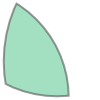

In [250]:
intersect(points)